In [ ]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

import warnings
warnings.filterwarnings('ignore')

import requests
import glob
import xlrd

In [ ]:
df1=pd.read_csv(r"/content/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df2=pd.read_csv(r"/content/Resaleflat.CSV")
df3=pd.read_csv(r"/content/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df4=pd.read_csv(r"/content/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df5=pd.read_csv( r"/content/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df=pd.concat([df1,df2,df3,df4,df5],ignore_index=True)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979.0,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978.0,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980.0,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980.0,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980.0,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
226825,2001-06,WOODLANDS,EXECUTIVE,788,WOODLANDS AVE 6,01 TO 03,141.0,Apartment,1997.0,NaN,384000.0
226826,2001-06,WOODLANDS,EXECUTIVE,788,WOODLANDS AVE 6,13 TO 15,141.0,Apartment,1997.0,NaN,425000.0
226827,2001-06,WOODLANDS,EXECUTIVE,788,WOODLANDS AVE 6,04 TO 06,143.0,Apartment,1997.0,NaN,400188.0
226828,2001-06,WOODLANDS,EXECUTIVE,788,WOODLANDS AVE 6,10 TO 12,143.0,Apartment,1997.0,NaN,412000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226830 entries, 0 to 226829
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                226830 non-null  object 
 1   town                 226830 non-null  object 
 2   flat_type            226830 non-null  object 
 3   block                226829 non-null  object 
 4   street_name          226829 non-null  object 
 5   storey_range         226829 non-null  object 
 6   floor_area_sqm       226827 non-null  float64
 7   flat_model           226827 non-null  object 
 8   lease_commence_date  226827 non-null  float64
 9   remaining_lease      69360 non-null   object 
 10  resale_price         226827 non-null  float64
dtypes: float64(3), object(8)
memory usage: 19.0+ MB


In [ ]:
df.shape


(226830, 11)

In [ ]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,226827.0,96.655385,25.523239,28.0,73.0,96.0,114.0,280.0
lease_commence_date,226827.0,1988.543881,9.851470,1966.0,1982.0,1987.0,1996.0,2016.0
resale_price,226827.0,358855.171926,157214.114064,33000.0,242000.0,350000.0,450000.0,1180000.0


In [ ]:
df['resale_price'].value_counts()

resale_price
400000.0    2093
380000.0    2040
350000.0    1977
420000.0    1845
360000.0    1807
            ... 
500008.0       1
530103.0       1
521388.0       1
444188.0       1
400188.0       1
Name: count, Length: 4015, dtype: int64

In [ ]:
df.nunique()

month                    95
town                     26
flat_type                 7
block                  2215
street_name             535
storey_range             26
floor_area_sqm          177
flat_model               20
lease_commence_date      51
remaining_lease         642
resale_price           4015
dtype: int64

In [ ]:
df.isna().sum()


month                       0
town                        0
flat_type                   0
block                       1
street_name                 1
storey_range                1
floor_area_sqm              3
flat_model                  3
lease_commence_date         3
remaining_lease        157470
resale_price                3
dtype: int64

In [ ]:
def convert_to_years(row):
    if pd.notna(row) and isinstance(row,str):
        if 'years' in row:
            parts=row.split()
            years=float(parts[0])
            months=float(parts[2]) if len(parts) > 2 else 0
            return years + months/ 12

    return row

In [ ]:
df['remaining_lease'] =df['remaining_lease'].apply(convert_to_years)
df['remaining_lease']=df['remaining_lease'].fillna(df['remaining_lease'].mode()[0])
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
226825,2001-06,WOODLANDS,EXECUTIVE,788,WOODLANDS AVE 6,01 TO 03,141.0,Apartment,1997.0,68.0,384000.0
226826,2001-06,WOODLANDS,EXECUTIVE,788,WOODLANDS AVE 6,13 TO 15,141.0,Apartment,1997.0,68.0,425000.0
226827,2001-06,WOODLANDS,EXECUTIVE,788,WOODLANDS AVE 6,04 TO 06,143.0,Apartment,1997.0,68.0,400188.0
226828,2001-06,WOODLANDS,EXECUTIVE,788,WOODLANDS AVE 6,10 TO 12,143.0,Apartment,1997.0,68.0,412000.0
226829,2001-06,WOODLANDS,EXECUTIVE,NaN,NaN,NaN,NaN,NaN,NaN,68.0,NaN


In [ ]:
df['remaining_lease'].value_counts()

remaining_lease
68.000000    159872
67.000000      1998
69.000000      1726
71.000000      1604
84.000000      1517
              ...  
96.583333         2
72.500000         2
49.333333         2
49.166667         1
47.333333         1
Name: count, Length: 593, dtype: int64

In [ ]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  1
street_name            1
storey_range           1
floor_area_sqm         3
flat_model             3
lease_commence_date    3
remaining_lease        0
resale_price           3
dtype: int64

In [ ]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date    float64
remaining_lease        float64
resale_price           float64
dtype: object

In [ ]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979.0,61.333333,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978.0,60.583333,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980.0,62.416667,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980.0,62.083333,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980.0,62.416667,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
226825,2001-06,WOODLANDS,EXECUTIVE,788,WOODLANDS AVE 6,01 TO 03,141.0,Apartment,1997.0,68.000000,384000.0
226826,2001-06,WOODLANDS,EXECUTIVE,788,WOODLANDS AVE 6,13 TO 15,141.0,Apartment,1997.0,68.000000,425000.0
226827,2001-06,WOODLANDS,EXECUTIVE,788,WOODLANDS AVE 6,04 TO 06,143.0,Apartment,1997.0,68.000000,400188.0
226828,2001-06,WOODLANDS,EXECUTIVE,788,WOODLANDS AVE 6,10 TO 12,143.0,Apartment,1997.0,68.000000,412000.0


In [ ]:
#month column
#seperate the year and month of resale because this is time series data

df[['resale_year','resale_month']]=df['month'].str.split('-',expand=True)

#drop the resale month column
df.drop('month',axis=1,inplace=True)

df.head(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,resale_year,resale_month
0,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979.0,61.333333,232000.0,2017,01
1,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978.0,60.583333,250000.0,2017,01


In [ ]:
#split the 'Range' column into upper_bound and lower_bound

df[['storey_lower_bound','storey_upper_bound']]=df['storey_range'].str.split("TO",expand=True)

df['storey_lower_bound']=pd.to_numeric(df['storey_lower_bound'])
df['storey_upper_bound']=pd.to_numeric(df['storey_upper_bound'])
df.tail(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,resale_year,resale_month,storey_lower_bound,storey_upper_bound
226828,WOODLANDS,EXECUTIVE,788,WOODLANDS AVE 6,10 TO 12,143.0,Apartment,1997.0,68.0,412000.0,2001,06,10.0,12.0
226829,WOODLANDS,EXECUTIVE,NaN,NaN,NaN,NaN,NaN,NaN,68.0,NaN,2001,06,NaN,NaN


In [ ]:
df.drop('storey_range',axis=1,inplace=True)

In [ ]:
#CONVERTING

df["block"]=pd.to_numeric(df['block'],errors='coerce')
df["resale_year"]=pd.to_numeric(df['resale_year'],errors='coerce')
df["resale_month"]=pd.to_numeric(df['resale_month'],errors='coerce')
df["block"]=df["block"].fillna(df['block'].mode()[0])

In [ ]:
df.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,2 ROOM,406.0,ANG MO KIO AVE 10,44.0,Improved,1979.0,61.333333,232000.0,2017,1,10.0,12.0
1,ANG MO KIO,3 ROOM,108.0,ANG MO KIO AVE 4,67.0,New Generation,1978.0,60.583333,250000.0,2017,1,1.0,3.0
2,ANG MO KIO,3 ROOM,602.0,ANG MO KIO AVE 5,67.0,New Generation,1980.0,62.416667,262000.0,2017,1,1.0,3.0
3,ANG MO KIO,3 ROOM,465.0,ANG MO KIO AVE 10,68.0,New Generation,1980.0,62.083333,265000.0,2017,1,4.0,6.0
4,ANG MO KIO,3 ROOM,601.0,ANG MO KIO AVE 5,67.0,New Generation,1980.0,62.416667,265000.0,2017,1,1.0,3.0


In [ ]:
df.dtypes

town                    object
flat_type               object
block                  float64
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date    float64
remaining_lease        float64
resale_price           float64
resale_year              int64
resale_month             int64
storey_lower_bound     float64
storey_upper_bound     float64
dtype: object

In [ ]:
object_data_cols=[var for var in df.columns if df[var].dtype=='object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [ ]:
df['town'].value_counts()

town
TAMPINES           20042
JURONG WEST        17661
WOODLANDS          17572
YISHUN             15825
BEDOK              15487
ANG MO KIO         12610
HOUGANG            12047
BUKIT BATOK        10185
PASIR RIS           9929
CHOA CHU KANG       9764
BUKIT MERAH         8637
SENGKANG            8184
TOA PAYOH           7598
CLEMENTI            6845
QUEENSTOWN          6629
BUKIT PANJANG       6600
KALLANG/WHAMPOA     6528
GEYLANG             6517
JURONG EAST         5689
SERANGOON           5585
PUNGGOL             5222
BISHAN              4650
SEMBAWANG           3077
MARINE PARADE       1706
CENTRAL AREA        1659
BUKIT TIMAH          582
Name: count, dtype: int64

In [ ]:
df['flat_type'].value_counts()

flat_type
4 ROOM              88943
3 ROOM              69411
5 ROOM              48547
EXECUTIVE           17470
2 ROOM               2156
1 ROOM                202
MULTI-GENERATION      101
Name: count, dtype: int64

In [ ]:
df['street_name'].value_counts()

street_name
YISHUN RING RD        4131
ANG MO KIO AVE 10     3426
BEDOK RESERVOIR RD    3156
ANG MO KIO AVE 3      2935
PASIR RIS ST 71       2419
                      ... 
CLEMENTI ST 11           8
SENG POH RD              5
KG BAHRU HILL            4
MARINE PARADE CTRL       1
SEMBAWANG WAY            1
Name: count, Length: 535, dtype: int64

In [ ]:
df['flat_model'].value_counts()

flat_model
Model A                   67818
Improved                  57697
New Generation            45601
Simplified                14115
Premium Apartment         12582
Apartment                  9669
Standard                   8931
Maisonette                 6237
Model A2                   2013
DBSS                        778
Adjoined flat               423
Model A-Maisonette          357
Type S1                     209
Terrace                     132
Multi Generation            101
Type S2                      95
Premium Maisonette           31
Improved-Maisonette          28
Premium Apartment Loft        7
2-room                        3
Name: count, dtype: int64

In [ ]:
df['flat_model']=df['flat_model'].replace({'MODEL A':'model A','NEW GENERATION':'New Generation',
                                           'IMPROVED':'Improved','PREMIUM APARTMENT':'Premium Apartment',
                                           'MULTI GENERATION':'Multi Generation','2-ROOM':'2-room',
                                           'SIMPLIFIED':'Simplified','STANDARD':'Standard',
                                           'MAISONETTE':'Maisonette','MULTI GENERATION':'Multi Generation',
                                           'APARTMENT':'Apartment','MODEL A-MAISONETTE':'Model A-Maisonette',
                                           'TERRACE':'Terrace','IMPROVED-MAISONETTE':'Improved-Maisonette'})

In [ ]:
df['flat_model'].value_counts()

flat_model
Model A                   67818
Improved                  57697
New Generation            45601
Simplified                14115
Premium Apartment         12582
Apartment                  9669
Standard                   8931
Maisonette                 6237
Model A2                   2013
DBSS                        778
Adjoined flat               423
Model A-Maisonette          357
Type S1                     209
Terrace                     132
Multi Generation            101
Type S2                      95
Premium Maisonette           31
Improved-Maisonette          28
Premium Apartment Loft        7
2-room                        3
Name: count, dtype: int64

In [ ]:
df.duplicated().sum()

52942

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
float_data_cols=[var for var in df.columns if df[var].dtype=='float64']
float_data_cols

['block',
 'floor_area_sqm',
 'lease_commence_date',
 'remaining_lease',
 'resale_price',
 'storey_lower_bound',
 'storey_upper_bound']

In [ ]:
integer_data_cols=[var for var in df.columns if df[var].dtype=='int64']
integer_data_cols

['resale_year', 'resale_month']

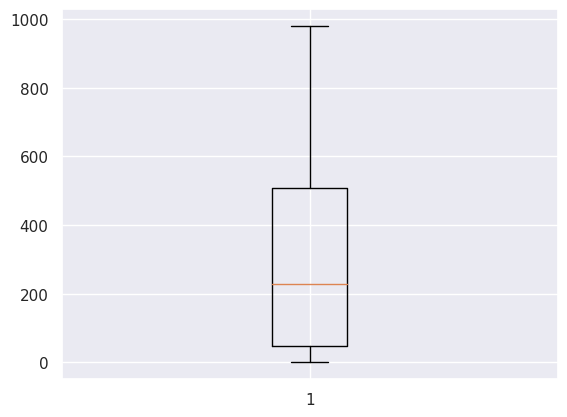

In [ ]:
#creating plot
plt.boxplot(df['block'])

#show plot
plt.show()

In [ ]:
#IQR
Q1=df['block'].quantile(0.25)
Q3=df['block'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

lower_bound, upper_bound

(-646.0, 1202.0)

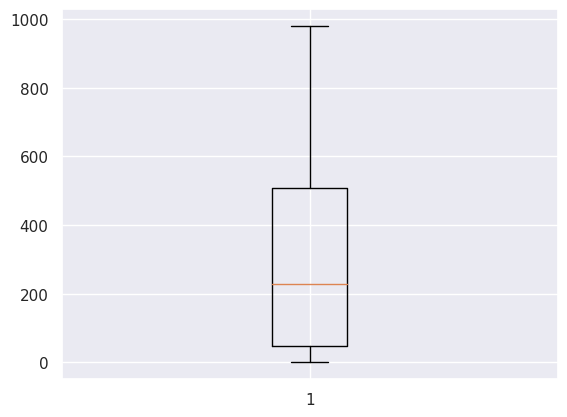

In [ ]:
df.block=df.block.clip(lower_bound,upper_bound)
#creating plot
plt.boxplot(df['block'])

#show plot
plt.show()

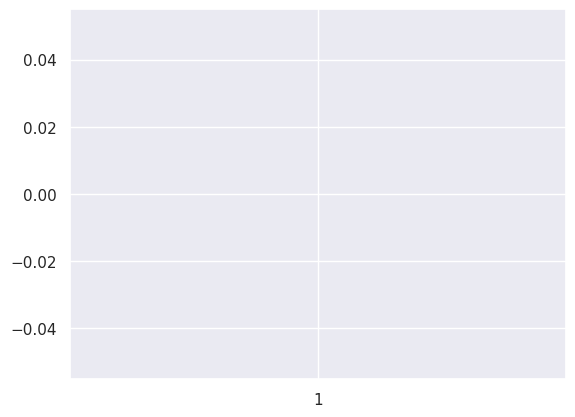

In [ ]:
#creating plot
plt.boxplot(df['floor_area_sqm'])

#show plot
plt.show()

In [ ]:
Q1=df['floor_area_sqm'].quantile(0.25)
Q2=df['floor_area_sqm'].quantile(0.75)

IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

lower_bound,upper_bound

(-581.0, 1163.0)

In [ ]:
df.floor_area_sqm=df.floor_area_sqm.clip(lower_bound,upper_bound)

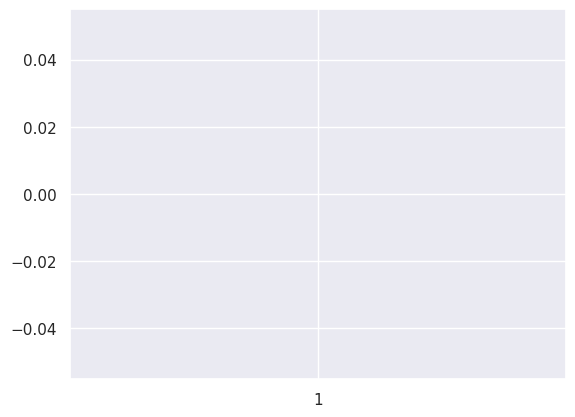

In [ ]:
plt.boxplot(df['floor_area_sqm'])

#show plot
plt.show()

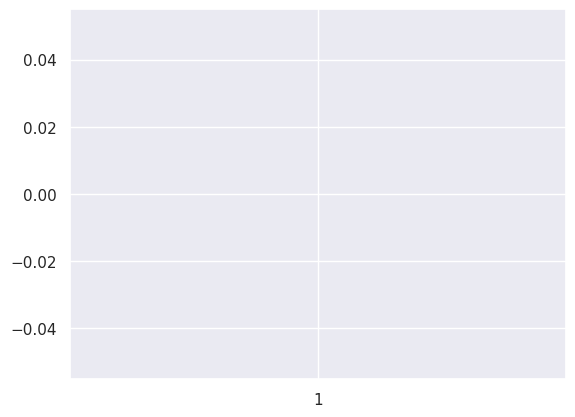

In [ ]:
#creating plot
plt.boxplot(df['resale_price'])

#show plot
plt.show()

In [ ]:
Q1=df['resale_price'].quantile(0.25)
Q3=df['resale_price'].quantile(0.75)

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

lower_bound,upper_bound

(287346.0, 474654.0)

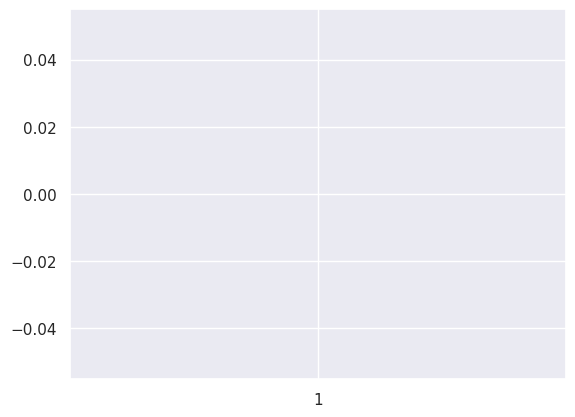

In [ ]:
#creating plot
plt.boxplot(df['resale_price'])

#show plot
plt.show()

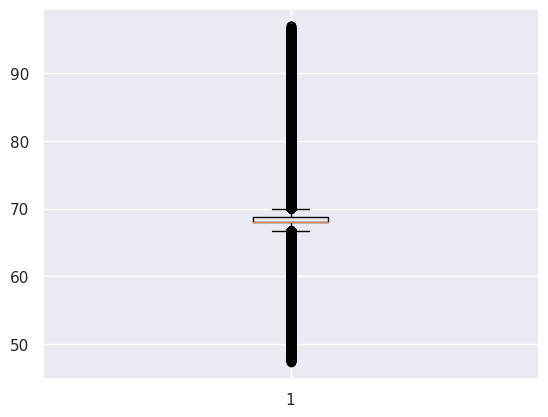

In [ ]:
plt.boxplot(df['remaining_lease'])

#show plot
plt.show()

In [ ]:
Q1=df['remaining_lease'].quantile(0.25)
Q3=df['remaining_lease'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

lower_bound,upper_bound

(66.75, 70.08333333333331)

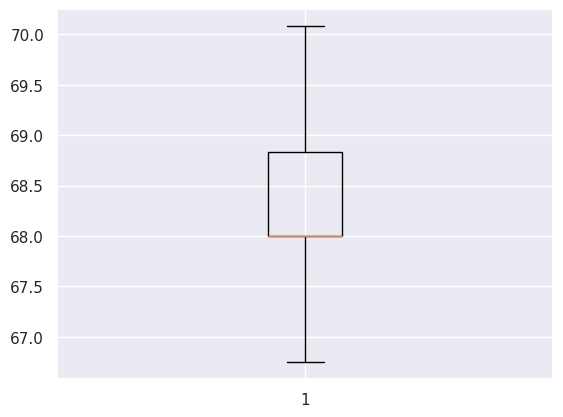

In [ ]:
df.remaining_lease=df.remaining_lease.clip(lower_bound,upper_bound)
#creating plot
plt.boxplot(df['remaining_lease'])
#sow plot
plt.show()

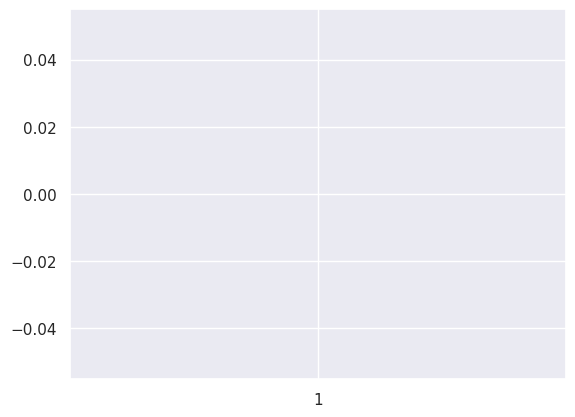

In [ ]:
plt.boxplot(df['lease_commence_date'])

#show plot
plt.show()

In [ ]:
Q1=df['lease_commence_date'].quantile(0.25)
Q3=df['lease_commence_date'].quantile(0.75)

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

lower_bound,upper_bound

(1980.75, 1998.25)

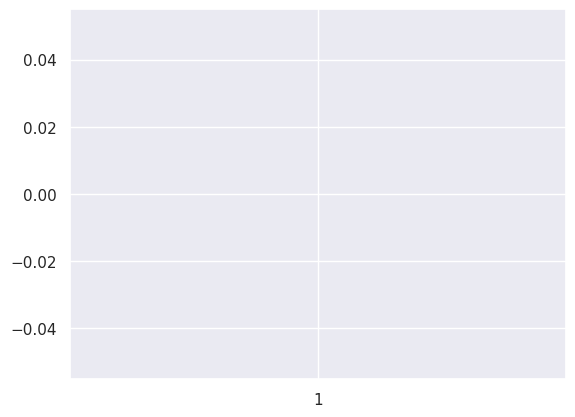

In [ ]:
df.lease_commence_date=df.lease_commence_date.clip(lower_bound,upper_bound)
#creating plot
plt.boxplot(df['lease_commence_date'])

#show plot
plt.show()

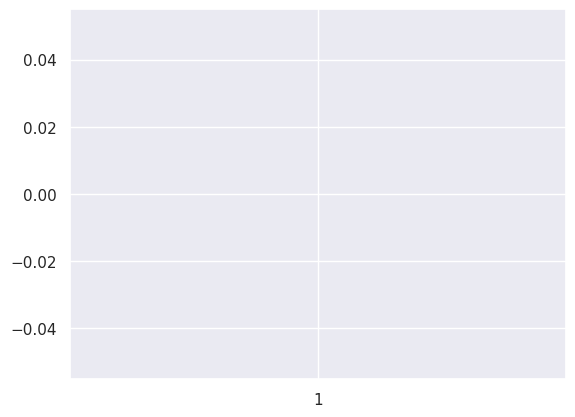

In [ ]:
plt.boxplot(df['storey_lower_bound'])
plt.show()

In [ ]:
Q1=df['storey_lower_bound'].quantile(0.25)
Q3=df['storey_lower_bound'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

lower_bound,upper_bound

(-5.0, 19.0)

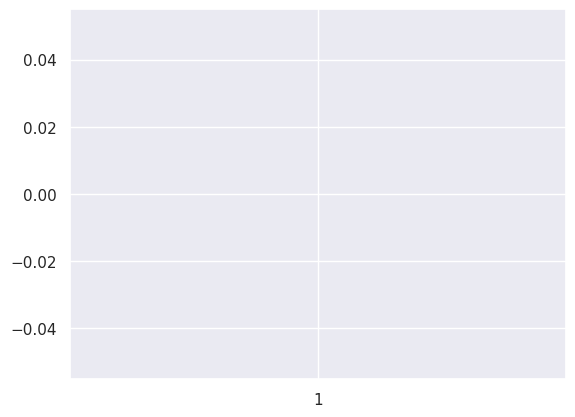

In [ ]:
df.storey_lower_bound=df.storey_lower_bound.clip(lower_bound,upper_bound)
#creating plot
plt.boxplot(df['storey_lower_bound'])

#show plot
plt.show()

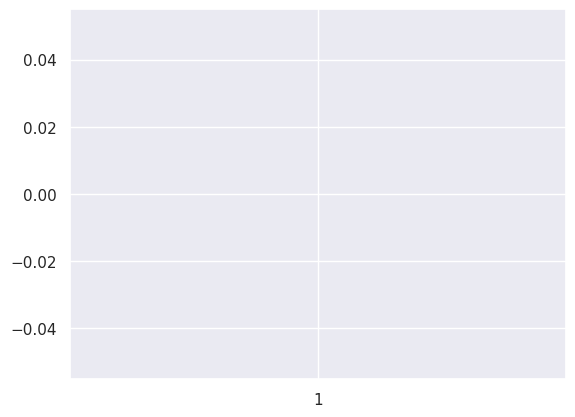

In [ ]:
plt.boxplot(df['storey_upper_bound'])

#show plot
plt.show()

In [ ]:
Q1=df['storey_lower_bound'].quantile(0.25)
Q2=df['storey_lower_bound'].quantile(0.75)

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

lower_bound,upper_bound

(-5.0, 19.0)

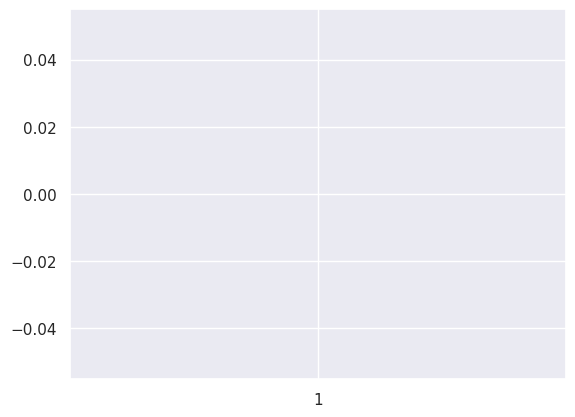

In [ ]:
df.storey_lower_bound=df.storey_lower_bound.clip(lower_bound,upper_bound)
#creating plot
plt.boxplot(df['storey_lower_bound'])

#show plot
plt.show()

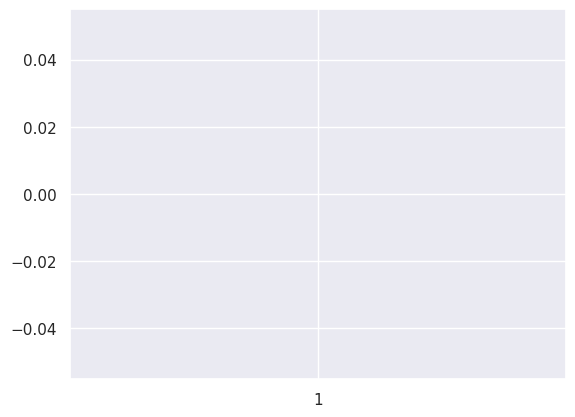

In [ ]:
#creating plot
plt.boxplot(df['storey_upper_bound'])

#show plot
plt.show()

In [ ]:
Q1=df['storey_upper_bound'].quantile(0.25)
Q3=df['storey_upper_bound'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

lower_bound,upper_bound

(-3.0, 21.0)

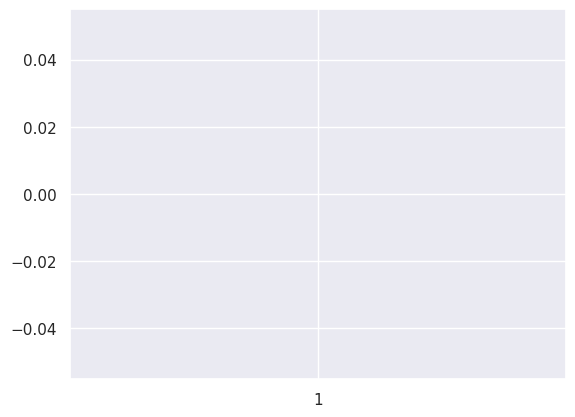

In [ ]:
df.storey_upper_bound=df.storey_upper_bound.clip(lower_bound,upper_bound)
#creating plot
plt.boxplot(df['storey_upper_bound'])

#show plot
plt.show()

In [ ]:
object_data_cols=[var for var in df.columns if df[var].dtype=='object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

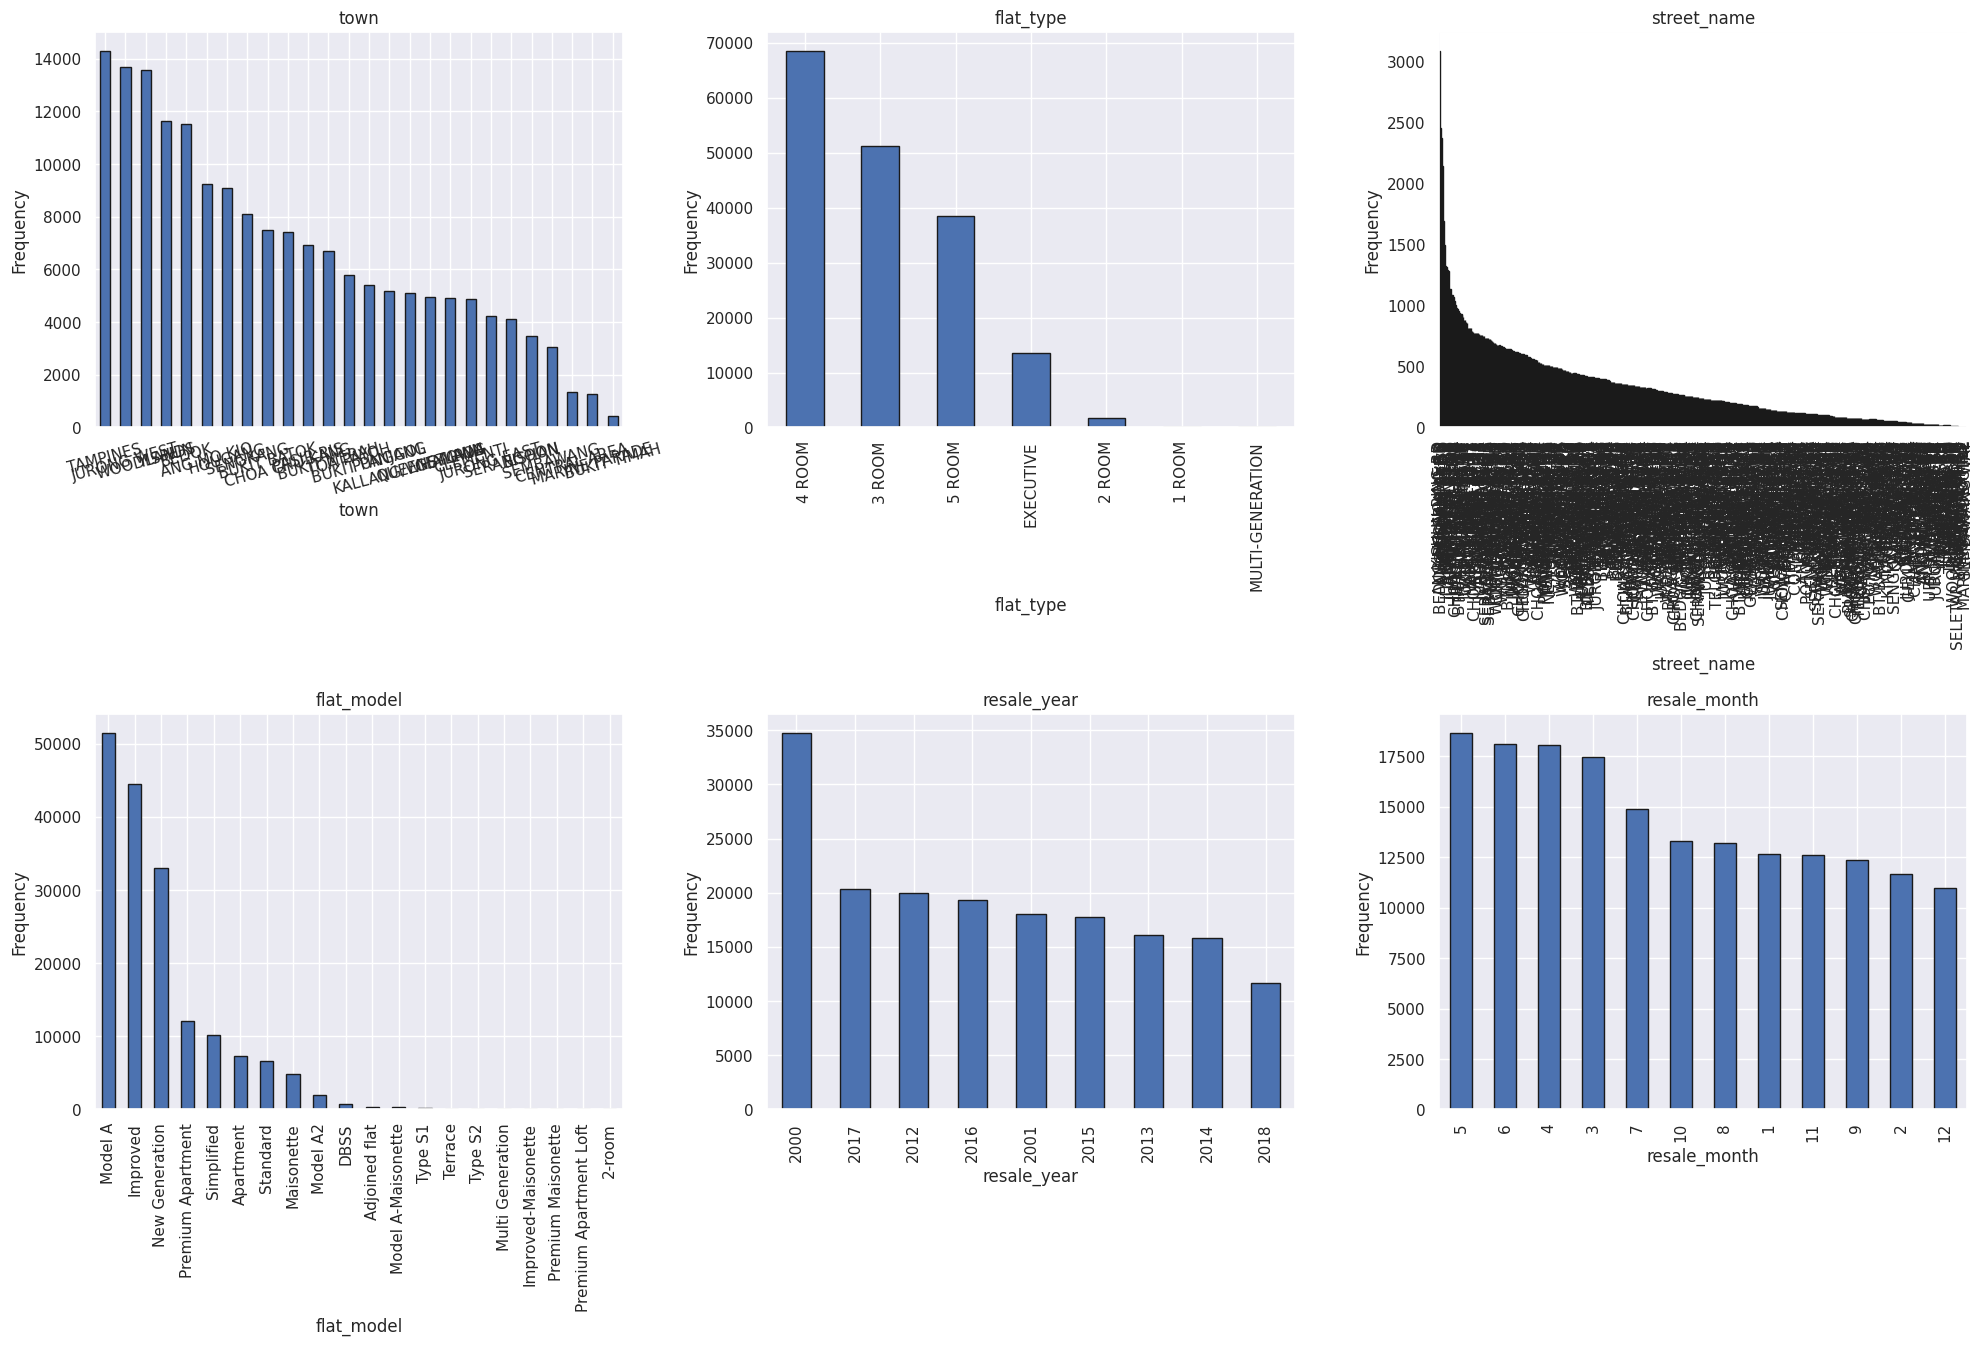

In [ ]:
plt.figure(figsize=(20,25))

plt.subplot(431)
df['town'].value_counts().sort_values(ascending=False).plot(kind='bar',edgecolor='k')
plt.title('town')
plt.xlabel('town')
plt.ylabel('Frequency')
plt.xticks(rotation=15)

plt.subplot(432)
df['flat_type'].value_counts().sort_values(ascending=False).plot(kind='bar',edgecolor='k')
plt.title('flat_type')
plt.xlabel('flat_type')
plt.ylabel('Frequency')

plt.subplot(433)
df['street_name'].value_counts().sort_values(ascending=False).plot(kind='bar',edgecolor='k')
plt.title('street_name')
plt.xlabel('street_name')
plt.ylabel('Frequency')

plt.subplot(434)
df['flat_model'].value_counts().sort_values(ascending=False).plot(kind='bar',edgecolor='k')
plt.title('flat_model')
plt.xlabel('flat_model')
plt.ylabel('Frequency')

plt.subplot(435)
df['resale_year'].value_counts().sort_values(ascending=False).plot(kind='bar',edgecolor='k')
plt.title('resale_year')
plt.xlabel('resale_year')
plt.ylabel('Frequency')

plt.subplot(436)
df['resale_month'].value_counts().sort_values(ascending=False).plot(kind='bar',edgecolor='k')
plt.title('resale_month')
plt.xlabel('resale_month')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

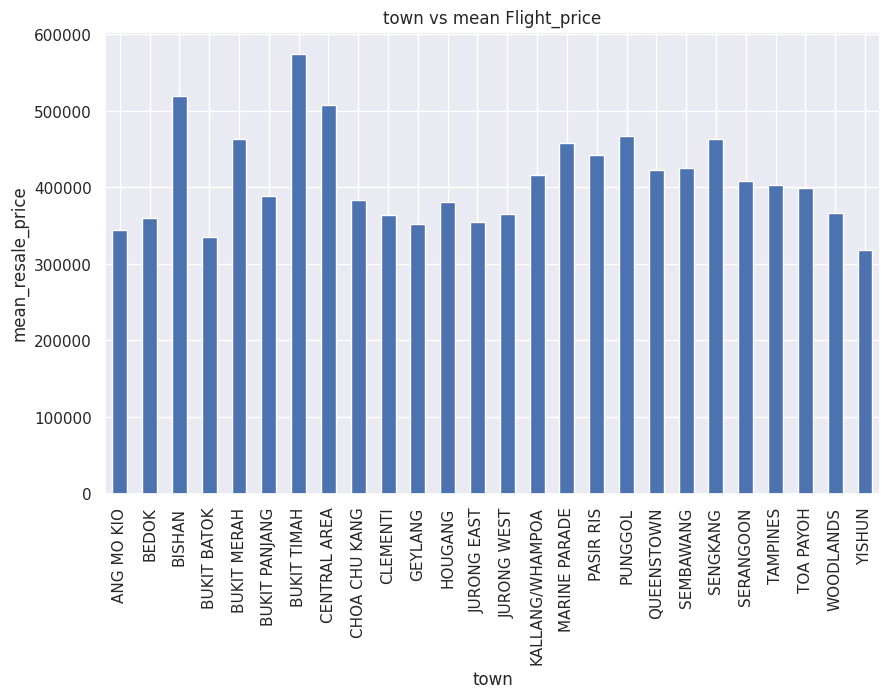

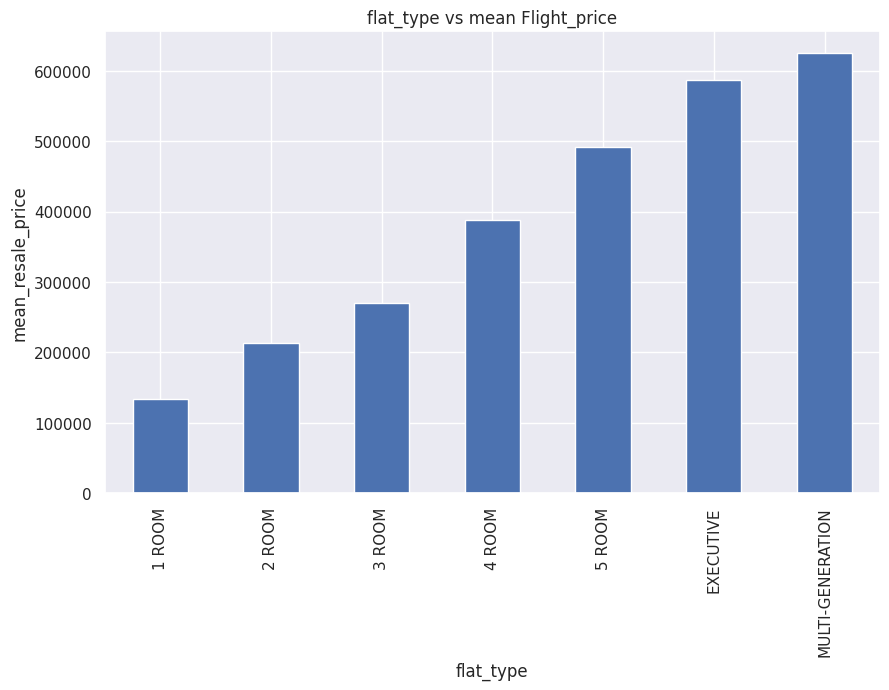

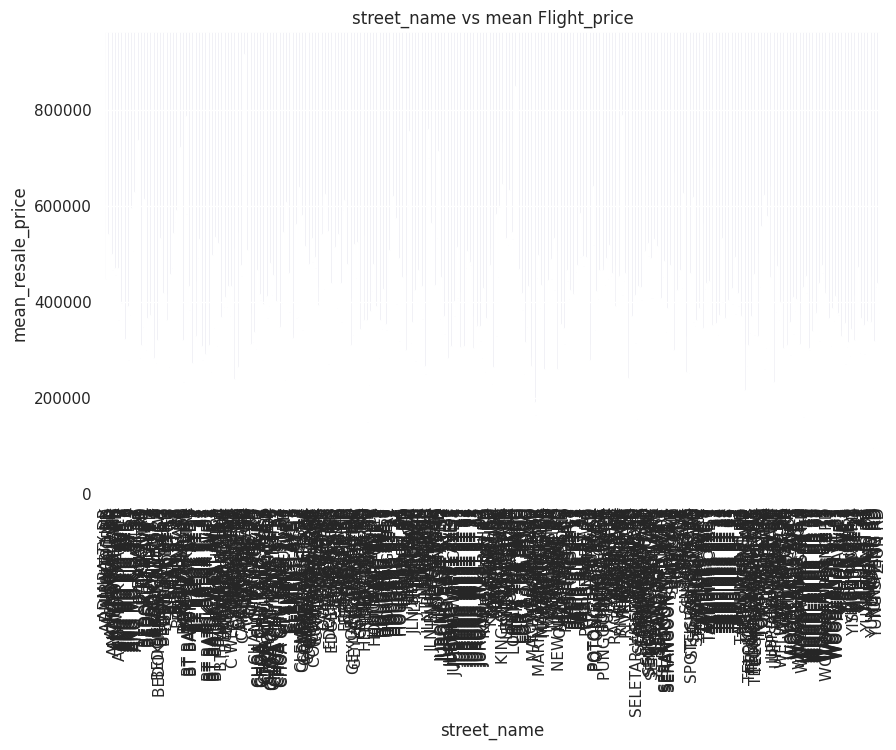

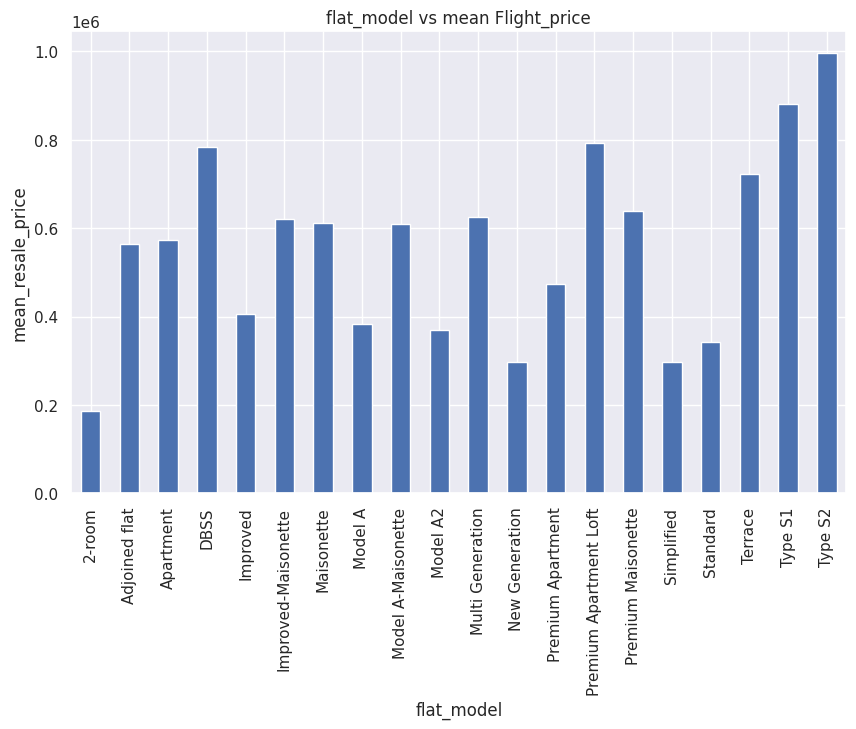

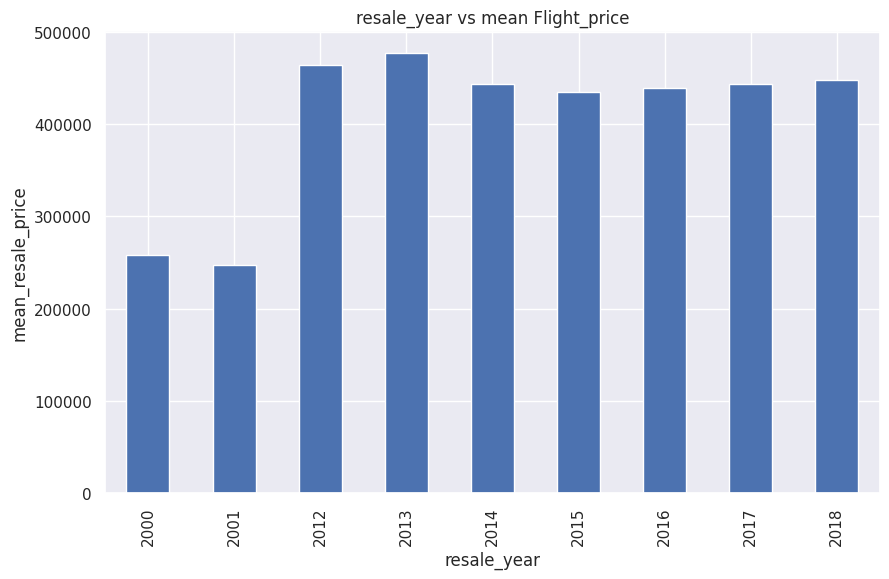

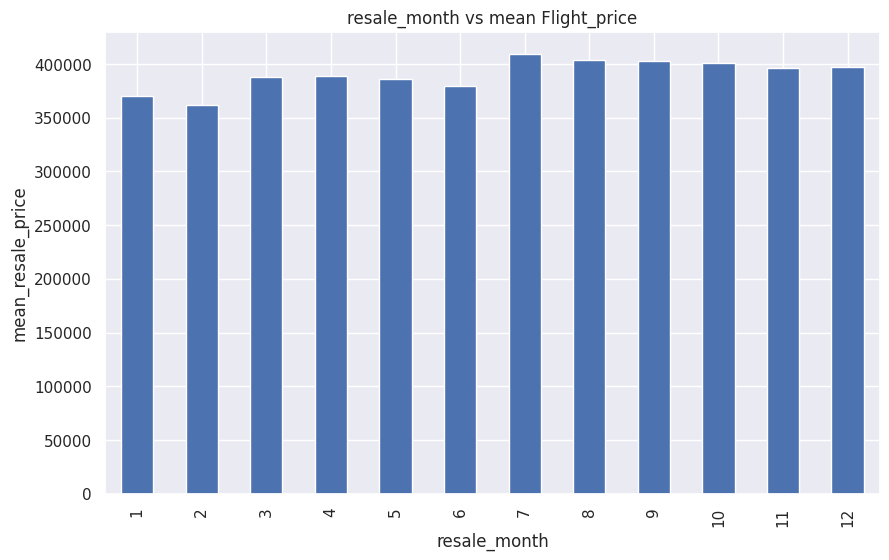

In [ ]:
#List of features to plot
features=[
    'town',
    'flat_type',
    'street_name',
    'flat_model',
    'resale_year',
    'resale_month'

]

for feature in features:
    plt.figure(figsize=(10,6))
    df.groupby(feature)['resale_price'].mean().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('mean_resale_price')
    plt.title(f'{feature} vs mean Flight_price')
    plt.show()

In [ ]:
float_data_cols=[var for var in df.columns if df[var].dtype=='float_64']
float_data_cols

[]

In [ ]:
integer_data_cols=[var for var in df.columns if df[var].dtype =='int64']
integer_data_cols

['resale_year', 'resale_month']

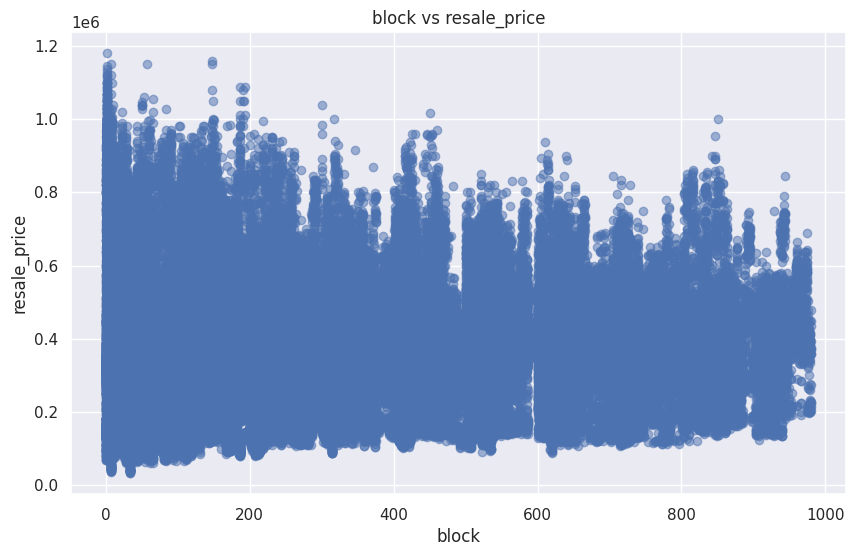

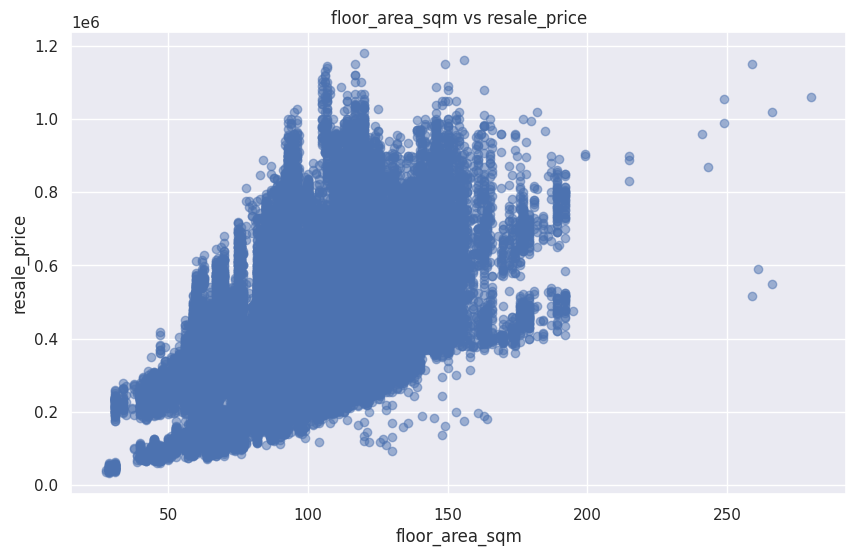

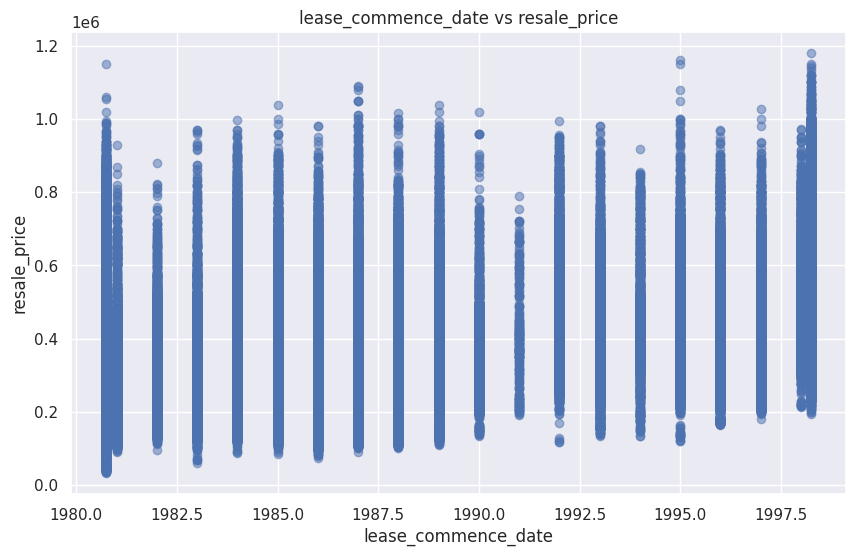

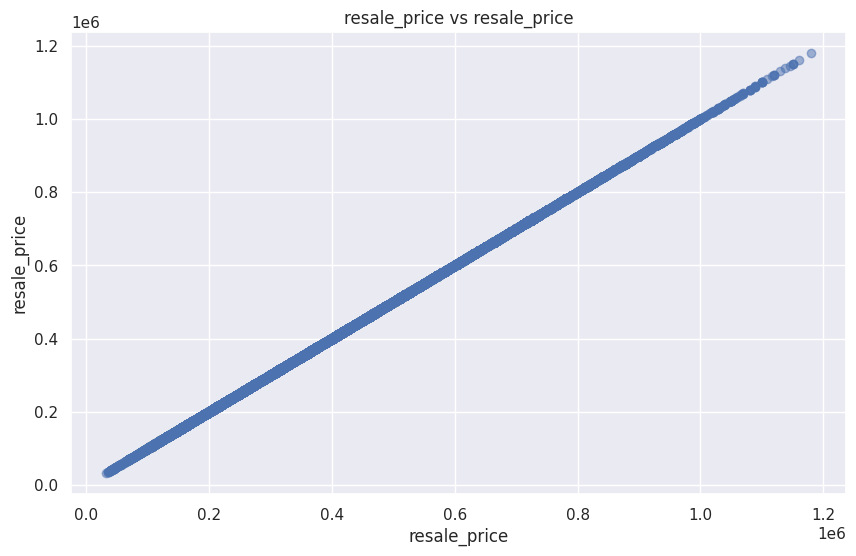

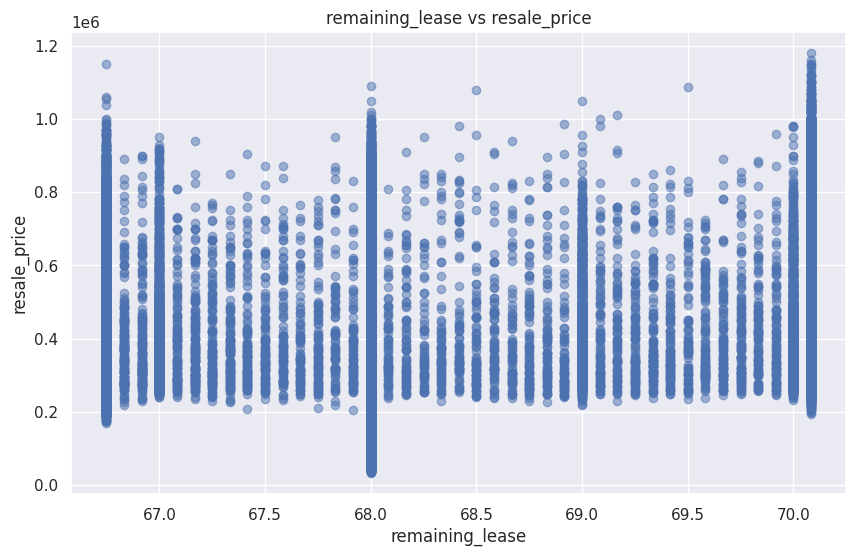

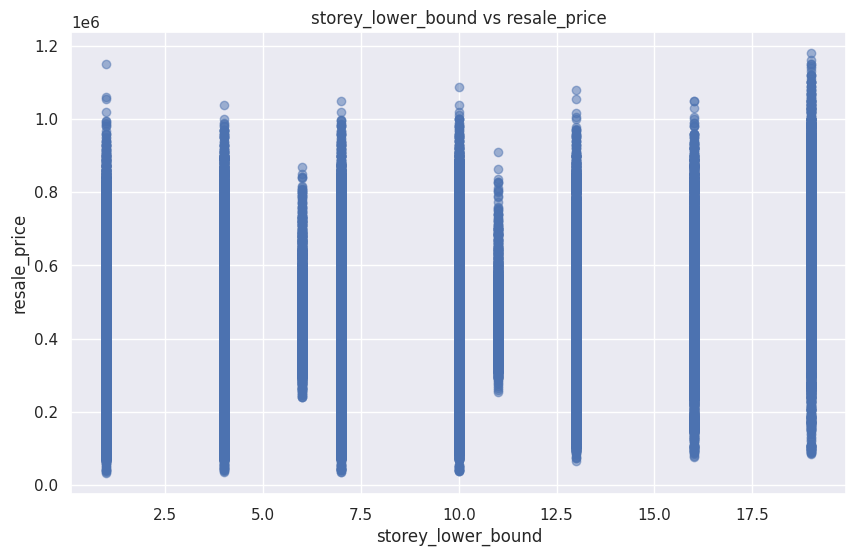

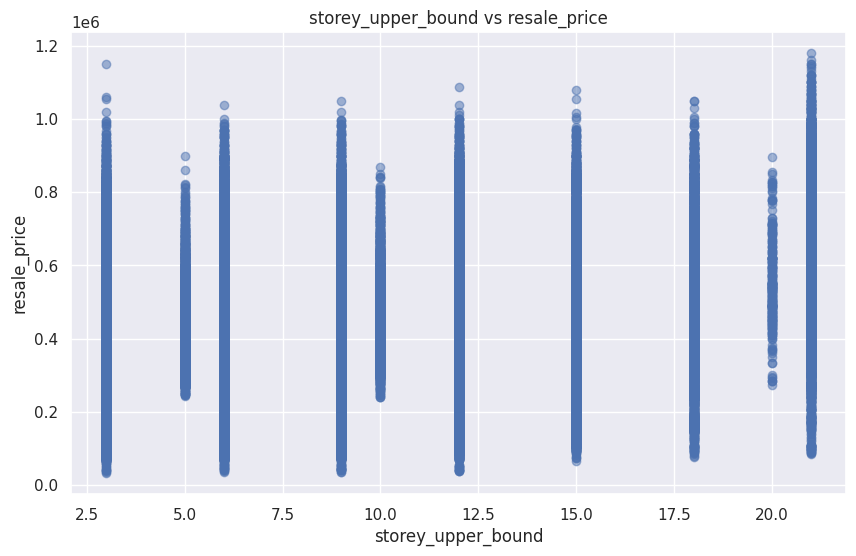

In [ ]:
features=['block',
          'floor_area_sqm',
          'lease_commence_date',
          'resale_price',
          'remaining_lease',
          'storey_lower_bound',
          'storey_upper_bound']

target='resale_price'
for feature in features:
    plt.figure(figsize=(10,6))
    plt.scatter(df[feature],df[target],alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')
    plt.show()

In [ ]:
#using encoding make a copy
df1=df.copy()

object_data_cols=[var for var in df.columns if df[var].dtype=='object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [ ]:
from sklearn.preprocessing  import LabelEncoder
#initialise the Encoder
le=LabelEncoder()
#list unique street names
streets=df1['street_name'].unique()
#map the streets to provide the input to the ML model
streets_mapping ={street:idx+1 for idx, street in enumerate(streets)}
streets_mapping

{'ANG MO KIO AVE 10': 1,
 'ANG MO KIO AVE 4': 2,
 'ANG MO KIO AVE 5': 3,
 'ANG MO KIO AVE 1': 4,
 'ANG MO KIO AVE 3': 5,
 'ANG MO KIO AVE 9': 6,
 'ANG MO KIO AVE 8': 7,
 'ANG MO KIO AVE 6': 8,
 'ANG MO KIO ST 52': 9,
 'BEDOK NTH AVE 4': 10,
 'BEDOK NTH AVE 1': 11,
 'BEDOK NTH RD': 12,
 'BEDOK STH AVE 1': 13,
 'BEDOK RESERVOIR RD': 14,
 'CHAI CHEE ST': 15,
 'BEDOK NTH ST 3': 16,
 'BEDOK STH RD': 17,
 'CHAI CHEE AVE': 18,
 'NEW UPP CHANGI RD': 19,
 'CHAI CHEE DR': 20,
 'BEDOK STH AVE 2': 21,
 'BEDOK NTH AVE 3': 22,
 'BEDOK RESERVOIR VIEW': 23,
 'CHAI CHEE RD': 24,
 'LENGKONG TIGA': 25,
 'BEDOK CTRL': 26,
 'JLN DAMAI': 27,
 'BEDOK NTH AVE 2': 28,
 'BEDOK STH AVE 3': 29,
 'SIN MING RD': 30,
 'SIN MING AVE': 31,
 'BISHAN ST 12': 32,
 'BISHAN ST 13': 33,
 'BISHAN ST 22': 34,
 'BISHAN ST 24': 35,
 'BISHAN ST 23': 36,
 'BRIGHT HILL DR': 37,
 'SHUNFU RD': 38,
 'BT BATOK ST 34': 39,
 'BT BATOK ST 51': 40,
 'BT BATOK ST 11': 41,
 'BT BATOK ST 52': 42,
 'BT BATOK ST 21': 43,
 'BT BATOK EAST AVE 5'

In [ ]:
#alter the column  with the mapped numbers
df1['street_name']=df1['street_name'].map(streets_mapping)

#dispaly the dataframe
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,2 ROOM,406.0,1,44.0,Improved,1980.75,66.75,232000.0,2017,1,10.0,12.0
1,ANG MO KIO,3 ROOM,108.0,2,67.0,New Generation,1980.75,66.75,250000.0,2017,1,1.0,3.0


In [ ]:
df1['flat_type'].unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [ ]:
category_mapping={
    '1 ROOM':1,
    '2 ROOM':2,
    '3 ROOM':3,
    '4.ROOM':4,
    '5.ROOM':5,
    'EXECUTIVE':6,
    'MULTI GENERATION':7
}

#alter the column with the mapped numbers
df1['flat_type']=df1['flat_type'].map(category_mapping)

#display the dataframe
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,2.0,406.0,1,44.0,Improved,1980.75,66.75,232000.0,2017,1,10.0,12.0
1,ANG MO KIO,3.0,108.0,2,67.0,New Generation,1980.75,66.75,250000.0,2017,1,1.0,3.0


In [ ]:
# creating a mapping of 'flat_model' values to numbers
flat_model_mapping={
    'IMPROVED':1,
    'NEW GENERATION':2,
    'MODEL A':3,
    'STANDARD':4,
    'SIMPLIFIED':5,
    'MODEL A-MAISONETTE':6,
    'APARTMENT':7,
    'MAISONETTE':8,
    'TERRACE':9,
    '2-ROOM':10,
    'IMPROVED-MAISONETTE':11,
    'MULTI GENERATION':12,
    'PREMIUM APARTMENT':13,
    'Improved':14,
    'New Generation':15,
    'Model A':16,
    'Standard':17,
    'Apartment':18,
    'Simplified':19,
    'Model A-Maisonette':20,
    'Maisonette':21,
    'Multi Generation':22,
    'Adjoineed flat':23,
    'Premium Apartment':24,
    'Terrace':25,
    'Improved Maisonette':26,
     'Premium Maisonette':27,
     '2-room':28,
     'Model A2':29,
     'DBSS':30,
     'Type S1':31,
     'Type S2':32,
     'Premium Apartment Loft':33,
     '3Gen':34


}

#map ''flat_model' values to numbers

df1['flat_model']=df1['flat_model'].map(flat_model_mapping)

#Display the Dataframe
df1.head(3)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,2.0,406.0,1,44.0,14.0,1980.75,66.75,232000.0,2017,1,10.0,12.0
1,ANG MO KIO,3.0,108.0,2,67.0,15.0,1980.75,66.75,250000.0,2017,1,1.0,3.0
2,ANG MO KIO,3.0,602.0,3,67.0,15.0,1980.75,66.75,262000.0,2017,1,1.0,3.0


In [ ]:
#create a mapping of  'town' values to numbers
town_mapping={
    'ANG MO KIO':1,
    'BEDOK':2,
    'BISHAN':3,
    'BHUKIT BATOK':4,
    'BHUKIT MERAH':5,
     'BHUKIT TIMAH':6,
     'CENTRAL AREA':7,
     'CHOA CHU KANG':8,
     'CLEMENTI':9,
     'GEYLANG':10,
     'HOUGANG':11,
     'JURONG EAST':12,
     'JURONG WEST':13,
     'KALLANG/WHAMPOA':14,
     'MARINE PARADE':15,
     'QUEENSTOWN':16,
     'SENGKANG':17,
     'SERANGOON':18,
     'TAMPINES':19,
      'TOA PAYOH':20,
      'WOODLANDS':21,
      'YISHUN':22,
      'LIM CHU KANG':23,
      'SEMBAWANG':24,
      'BUKIT PANJANG':25,
      'PASIR RIS':26,
      'PUNGGOL':27


}

#Map 'town' values to numbers
df1['town']=df1['town'].map(town_mapping)

#Display the dataframe
df1.head(4)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,1.0,2.0,406.0,1,44.0,14.0,1980.75,66.75,232000.0,2017,1,10.0,12.0
1,1.0,3.0,108.0,2,67.0,15.0,1980.75,66.75,250000.0,2017,1,1.0,3.0
2,1.0,3.0,602.0,3,67.0,15.0,1980.75,66.75,262000.0,2017,1,1.0,3.0
3,1.0,3.0,465.0,1,68.0,15.0,1980.75,66.75,265000.0,2017,1,4.0,6.0


In [ ]:
#save the processed data for the deployment
df1.to_csv('final.csv')


In [ ]:
#correlation matrix (ranges from 1 to -1)
corrm=df1.corr()

#corrm.to_csv('corrm_csv')
corrm

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,resale_year,resale_month,storey_lower_bound,storey_upper_bound
town,1.000000,0.274385,0.001934,0.632384,0.211774,0.173133,0.402532,0.256547,0.063063,0.059098,0.008738,0.001189,0.001997
flat_type,0.274385,1.000000,0.186217,0.161098,0.970948,0.734207,0.695467,0.382267,0.775921,0.055574,-0.000854,0.020688,0.021936
block,0.001934,0.186217,1.000000,0.008327,0.178108,-0.062886,0.041173,-0.018916,-0.118513,-0.134178,-0.013485,-0.129983,-0.130635
street_name,0.632384,0.161098,0.008327,1.000000,0.142976,0.090357,0.233184,0.129332,0.047271,0.005034,-0.000437,-0.030023,-0.029675
floor_area_sqm,0.211774,0.970948,0.178108,0.142976,1.000000,0.188172,0.492412,0.268577,0.606138,0.015712,-0.004502,0.050555,0.050855
flat_model,0.173133,0.734207,-0.062886,0.090357,0.188172,1.000000,0.372493,0.276630,0.252885,0.154544,0.010325,0.053915,0.054830
lease_commence_date,0.402532,0.695467,0.041173,0.233184,0.492412,0.372493,1.000000,0.601482,0.433003,0.211181,0.019338,0.153911,0.155185
remaining_lease,0.256547,0.382267,-0.018916,0.129332,0.268577,0.276630,0.601482,1.000000,0.272502,0.286328,-0.000747,0.123031,0.117478
resale_price,0.063063,0.775921,-0.118513,0.047271,0.606138,0.252885,0.433003,0.272502,1.000000,0.546173,0.060589,0.258347,0.265339
resale_year,0.059098,0.055574,-0.134178,0.005034,0.015712,0.154544,0.211181,0.286328,0.546173,1.000000,0.073431,0.082671,0.086572


<Axes: >

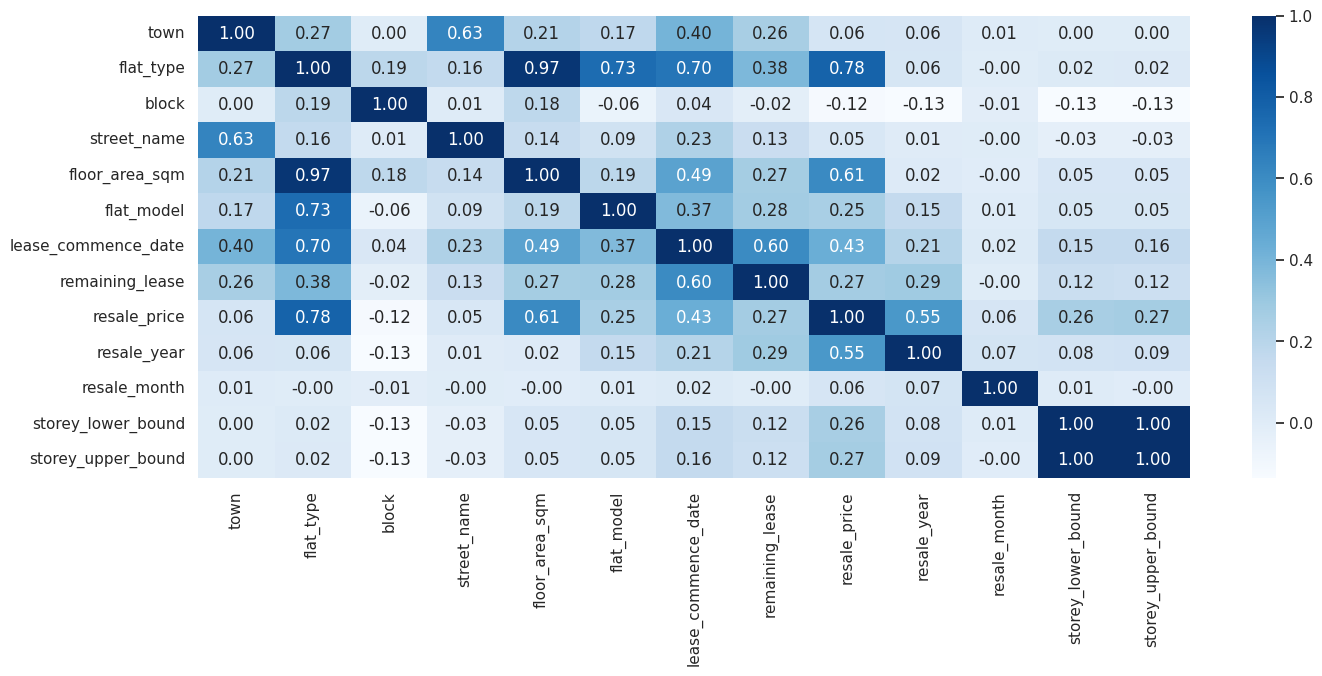

In [ ]:
#visualize the correlation matrix in seaborn using a heatmap
plt.figure(figsize=(16,6))
sns.heatmap(corrm,annot=True,cmap="Blues",fmt=".2f")

In [ ]:
#splitting the dataframe
#assign feature and target variable
x=df1.drop('resale_price',axis=1)
y=df1['resale_price']
#splitting the data into training and  testing sets with the ratio of 8:2
from sklearn.model_selection import train_test_split
x_train, x_test,y_train ,y_test=train_test_split(x,y,test_size=0.2,random_state=72)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(139110, 12) (34778, 12) (139110,) (34778,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)
x_train_scaled,x_test_scaled

(array([[-1.57115625,         nan, -0.22334589, ...,  0.84677851,
          1.39831847,  1.38337628],
        [ 0.54261442,         nan,  2.14132768, ...,  1.15426513,
         -0.59362594, -0.61158306],
        [ 1.59949975,         nan, -1.10313809, ...,  0.23180526,
         -0.59362594, -0.61158306],
        ...,
        [ 0.54261442,         nan, -0.09341877, ..., -1.30562786,
         -0.59362594, -0.61158306],
        [-0.64638158,         nan, -0.69479572, ..., -1.30562786,
         -1.25760742, -1.27656951],
        [ 0.54261442,         nan,  0.39287988, ...,  1.46175175,
          0.07035553,  0.05340339]]),
 array([[ 0.54261442,         nan, -0.29016555, ...,  0.53929188,
          0.07035553,  0.05340339],
        [ 0.27839308,         nan, -1.10313809, ...,  0.84677851,
          2.06229994,  2.04836273],
        [-0.38216025, -0.46881199, -0.3421364 , ..., -0.69065461,
         -1.25760742, -0.83324521],
        ...,
        [ 0.27839308,         nan, -1.10313809, ...,  

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb
from xgboost import XGBRegressor  #using XGBRegressor for regression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
#x train_scaled and y train_scaled has null values so replacing them with x_train_imputed,x_test_imputed

from sklearn.impute import SimpleImputer

# Instantiate the imputer with strategy as 'mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on training data
x_train_imputed = imputer.fit_transform(x_train_scaled)

# Transform the test data using the trained imputer
x_test_imputed = imputer.transform(x_test_scaled)

In [ ]:
#create and train the K Nearest Neighbor Regression model
knn_regressor=KNeighborsRegressor(n_neighbors=5)#may need to adjust number of neighbours
knn_regressor.fit(x_test_imputed,y_test)

#make predictions on the test set using KNN model
y_pred_knn=knn_regressor.predict(x_test_imputed)

#calculate Mean Absolute error (MAE)
mae_knn=mean_absolute_error(y_test,y_pred_knn)

#calculate Mean Squared error (MSE)
mse_knn=mean_squared_error(y_test,y_pred_knn)

#calculate the root mean squared error
rmse_knn=np.sqrt(mse_knn)

#calculate R-squared (r2 ) score:
r2_knn=r2_score(y_test,y_pred_knn)

print("Mean Absolute Error(MAE)    :",mae_knn)
print("Mean Squared Error (MSE)    :",mse_knn)
print("Root Mean square Error(RMSE):",rmse_knn)
print("R-squared(r2)score          :",r2_knn)

Mean Absolute Error(MAE)    : 30542.437836103283
Mean Squared Error (MSE)    : 2236410798.314691
Root Mean square Error(RMSE): 47290.705200014636
R-squared(r2)score          : 0.9106608933465301


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Or another strategy like 'median'
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1))  # Reshape for the imputer
y_train_imputed = y_train_imputed.ravel()  # Flatten back to 1D array

#create and train the random forest regressor model
rf_regressor=RandomForestRegressor(random_state=42)
rf_regressor.fit(x_train_imputed, y_train_imputed)

# make prediction using the test set
y_pred=rf_regressor.predict(x_test_imputed)

#calculate mean absolute error (MAE)
mae=mean_absolute_error(y_test,y_pred)

#calculate the mean squared error (MSE)
mse=mean_squared_error(y_test,y_pred)

#calculating the root mean squared error
rmse=np.sqrt(mse)

#calculate the R-squared (R2) score
rf_r2=r2_score(y_test,y_pred)

print("Mean Absolute Error(MAE)  :",mae)
print("Mean Squared Error(MSE)    :",mse)
print("Root Mean Square Error (RMSE):",rmse)
print("R-squared (R2)score          :",rf_r2 )

Mean Absolute Error(MAE)  : 15339.431342425043
Mean Squared Error(MSE)    : 502302415.914666
Root Mean Square Error (RMSE): 22412.10422773074
R-squared (R2)score          : 0.9799342548598349


In [ ]:
#create and train an XGBOOST REGRESSOR
xgregressor= XGBRegressor()
xgregressor.fit(x_train_imputed, y_train_imputed)

#make predictions
y_pred=xgregressor.predict(x_test)

#calculating mean absolute error (MAE)
mae=mean_absolute_error(y_test,y_pred)

#calculating mean squared error (MSE)
mse=mean_squared_error(y_test,y_pred)

#calculating the root mean squared error (RMSE)
rmse=np.sqrt(mse)

#calcualte R-squared (r2) score
xgb_r2=r2_score(y_test,y_pred)

print("Mean Absolute Error (MAE)   :",mae)
print("Mean squared Error(MSE)  :",mse)
print("Root Mean Squared Error (RMSE)     :",rmse)
print("R-squared (R2) Score      :",xgb_r2)

Mean Absolute Error (MAE)   : 400359.602064236
Mean squared Error(MSE)  : 184189109096.07434
Root Mean Squared Error (RMSE)     : 429172.58660831815
R-squared (R2) Score      : -6.35790154221314


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
#CREATE AND TRAIN THE DECISION TREE REGRESSOR MODEL
dt_regressor=DecisionTreeRegressor(max_depth=20,random_state=11)
dt_regressor.fit(x_train_imputed, y_train_imputed)

#make prediction on the test set using decision tree model
y_pred_dt=dt_regressor.predict(x_test_imputed)

#calculating the mean absolute error (MAE)
mae_dt=mean_absolute_error(y_test,y_pred_dt)

#calculating the mean squared error
mse_dt=mean_squared_error(y_test,y_pred_dt)

#calculating Root mean squared error
r2_dt=r2_score(y_test,y_pred_dt)

print("Mean Absolute Error (MAE)   :",mae_dt)
print("Mean Squared Error (MSE))  :" ,mse_dt)
print("Root Mean Squared Error (RMSE):" ,r2_dt)

Mean Absolute Error (MAE)   : 19449.416881833087
Mean Squared Error (MSE))  : 829985613.6756537
Root Mean Squared Error (RMSE): 0.9668441176742248


In [ ]:
models=['KNeighborsRegressor','DecisionTreeRegressor','RandomForestRegressor','XGBRegressor']
score=[r2_knn,r2_dt,rf_r2,xgb_r2]

fig=px.bar(x=models, y=score , title='R_2 Regression Models')
fig.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE\n")
max_score=max(score)  #Intialise max_score with the maximum value in the score list \
max_model=""

for model , score_value in zip(models,score):
    print(model,score_value)
    if score_value ==max_score:
        max_model=model

print(f"\nModel: {max_model} contain Maximum R2_Score:{max_score}")

FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE

KNeighborsRegressor 0.9106608933465301
DecisionTreeRegressor 0.9668441176742248
RandomForestRegressor 0.9799342548598349
XGBRegressor -6.35790154221314

Model: RandomForestRegressor contain Maximum R2_Score:0.9799342548598349


In [ ]:
rf_regressor.feature_importances_


array([0.08193369, 0.02474864, 0.03228108, 0.04328771, 0.36204536,
       0.02974187, 0.02247539, 0.00287141, 0.34589399, 0.00493181,
       0.02402165, 0.02576741])